## Introduction


The Purpose of this Project is to perform land use classification of Sattelite Images. The dataset used for this purpose is the UC Merced dataset, which consists of 21 land use classes. There are 100 images in each of the classes.  There are 100 images in each of the classes. The classes are the following -1) agricultural 2)airplane 3) baseballdiamond 4) beach 5) buildings 6) chaparral 7)denseresidential 8) forest 9)freeway 10) golfcourse 11)harbor 12) intersection 13) mediumresidential 14)mobilehomepark 15)overpass 16)parkinglot 17)river 18)runway 19)sparseresidential 20)storagetanks 21)tenniscourt.

Each image 256x256 pixels. The images were manually extracted from large images from the USGS National Map Urban Area Imagery collection for various urban areas in the US. The pixes resolution of the images is 1 foot.  The UC Merced dataset falls in the category of a remote sensing dataset. 

## Analysis Procedure

The following methodology will be followed in the performing the Land Use classification - <br>
1) The Dataset (UC merced) training dataset was studied. It was observed that the dataset consisted of 256x256 pixels. The dataset was chosen because there was no image segmentation. The images were such that each image contained only 1 land use class. <br>
2) For Each class, the Images were segregated as following 80 images were used for training, 10 images for validation and 10 for testing. <br>
3) The transfer learning technique was used for training and validation on the model.  The VGG16 model, used for detecting animal images was used as the base model. The weights for the VGG16 model, trained on the imagenet dataset were loaded on the model.<br>
4) All fully connected layers were removed from the VGG1 model and a new model- VGG16 minus the fully connected layers was created. This model was called conv_base. <br>
5) The input images (training and validation) were converted into arrays using the ImageDataGenerator function in Keras. The vector from this array was input into the conv_base network with frozen weights (belonging to Image net dataset). <br>
6) a new fully connected network was defined with a few layers.  The output from the frozen conv_base network was input to this fully connected network. One of the dense layers in the network was given 256 nodes because the image consisted of 256 pixels.

In [1]:
from contextlib import suppress
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import os
import warnings
import shutil
from skimage.io import imread, imsave

from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, classification_report

Using TensorFlow backend.


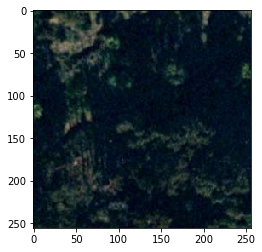

In [2]:
plt.imshow(imread('Images/forest/forest00.tif'))


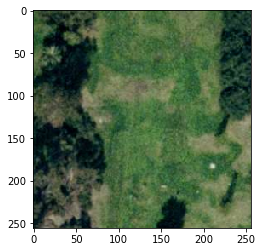

In [3]:
plt.imshow(imread('Images/golfcourse/golfcourse00.tif'))


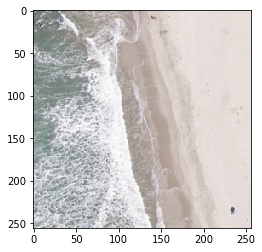

In [4]:
plt.imshow(imread('Images/beach/beach00.tif'))

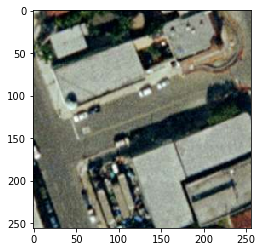

In [5]:
plt.imshow(imread('Images/buildings/buildings00.tif'))

## The Various Classes of Land Use are listed

In [6]:
# source_dir = os.path.join( 'Images')
# class_names = os.listdir(source_dir)
# class_names

labels=[
 'agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']


## Creating Train, Test and Validation datasets

 In the code section given below, 80 images are randomly selected from each class. The training dataset. Similarly, the remaining 10 images are selected and assigned to the validation dataset and 10 images are assigned to the testing dataset. All three datasets are mutually exclusive. that is, there is no common image among the three datasets

In [7]:
def complement (a,b):
    f2=[]
    for x in a:
        x=os.path.splitext(x)[0]+'.tif'
        if x not in os.listdir(path1_train):
            f2.append(x)
    return (f2)


In [8]:
# Selecting images for train
train_data_size=80
validate_data_size=10
test_data_size=10
for j in labels:
    path=os.path.join('Images',j)
    path1_train=os.path.join('dataset','train',j)
    path1_validate=os.path.join('dataset','validate',j)
    path1_test=os.path.join('dataset','test',j)
    
    shutil.rmtree(path1_train)
    os.makedirs(path1_train) 
    shutil.rmtree(path1_validate)
    os.makedirs(path1_validate) 
    shutil.rmtree(path1_test)
    os.makedirs(path1_test) 
    
    
    files1= os.listdir(path)
    files1=files1[1:len(files1)]
    files1= np.random.permutation(files1)
    for i in range(0,train_data_size):
        file=os.path.join(path,files1[i])
        img1=imread(file)
        n=os.path.splitext(file)
        n=n[0].split('\\')
        n1=os.path.join(path1_train, n[2] +'.png')
        imsave(n1,img1)

    print(path1_train, len(os.listdir(path1_train)))
    validate_data0 = complement(files1, os.listdir(path1_train))
    
    validate_data = np.random.permutation(validate_data0)
    for i in range( 0, validate_data_size):
        file=os.path.join(path,validate_data[i])
        img1=imread(file)
        n=os.path.splitext(file)
        n=n[0].split('\\')
        n1=os.path.join(path1_validate, n[2] +'.png')
        imsave(n1,img1)
    print(path1_validate, len(os.listdir(path1_validate))) 
    
    test_data0 = complement(validate_data0, os.listdir(path1_validate))
    test_data = np.random.permutation(test_data0)
    for i in range(0, test_data_size):
        file=os.path.join(path,test_data[i])
        img1=imread(file)
        n=os.path.splitext(file)
        n=n[0].split('\\')
        n1=os.path.join(path1_test, n[2] +'.png')
        imsave(n1,img1)
        
    print(path1_test, len(os.listdir(path1_test)))

C:\Users\ritvik\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: dataset\train\agricultural\agricultural55.png is a low contrast image
  warn('%s is a low contrast image' % fname)


dataset\train\agricultural 80
dataset\validate\agricultural 10
dataset\test\agricultural 10
dataset\train\airplane 80
dataset\validate\airplane 10
dataset\test\airplane 10
dataset\train\baseballdiamond 80
dataset\validate\baseballdiamond 10
dataset\test\baseballdiamond 10
dataset\train\beach 80
dataset\validate\beach 10
dataset\test\beach 10
dataset\train\buildings 80
dataset\validate\buildings 10
dataset\test\buildings 10
dataset\train\chaparral 80
dataset\validate\chaparral 10
dataset\test\chaparral 10
dataset\train\denseresidential 80
dataset\validate\denseresidential 10
dataset\test\denseresidential 10
dataset\train\forest 80
dataset\validate\forest 10
dataset\test\forest 10
dataset\train\freeway 80
dataset\validate\freeway 10
dataset\test\freeway 10
dataset\train\golfcourse 80
dataset\validate\golfcourse 10
dataset\test\golfcourse 10
dataset\train\harbor 80
dataset\validate\harbor 10
dataset\test\harbor 10
dataset\train\intersection 80
dataset\validate\intersection 10
dataset\test

The ImageDataGenerator is a function in Keras to convert images into arrays of a suitable size. This function has been used extensively in the code.

In [9]:
base_directory=path=os.path.join('Images')
train_dir=os.path.join('dataset','train')
validation_dir=os.path.join('dataset','validate')
test_dir=os.path.join('dataset','test')


train_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode=None)

Found 1680 images belonging to 23 classes.


## Architecture of The VGG16  network

The architecture of the VGG 16 model is given below. VGG 16 is a deep CNN developed by the Visual Geometry group of the Oxford University. It was initially used for the detection of animals. This VGG network is loaded with weights used to train it on the image-net dataset. The Image -net database designed for visual oject software research . Over 14 million objects have been hand annotated and labelled, and in at least one million of the images, bounding boxes have been provided on the object. The dataset contains over 20000 object classes. Thus, We believe, that the VGG 16 network trained on the Imagenet dataset will provide a strong foundation for applying transfer learning on any object classification problem.

In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False)
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

## The Conversion of Images into Data Arrays

In the code below the input image is converted into arrays. The Array is then fed to the frozen network Conv_base which is VGG minus the fully connected layers. An output vector is generated, which serves as the X values for the fully connected layer.
The labels in the training dataset are carried forward.

In [11]:
def extract_features(directory, sample_count,batch_size):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
    directory,
    batch_size=batch_size,
    shuffle=False)
    class_names=generator.class_indices
    
    image_count = 0
    X_batches, Y_batches = [], []
    for inputs_batch, labels_batch in generator:
        X_batches.append(conv_base.predict(inputs_batch))
        Y_batches.append(labels_batch)
        image_count += inputs_batch.shape[0]
        # Must interrupt image_generator
        if image_count >= generator.n:
                break
        X = np.concatenate(X_batches)  
        Y = np.concatenate(Y_batches)

    return X, Y,class_names

In [12]:

train_features, train_labels,class_names1 = extract_features(train_dir, 1681,64)


Found 1680 images belonging to 23 classes.


In [13]:
validation_features, validation_labels,c_names1 = extract_features(validation_dir, 300,10)
test_features, test_labels,c_names2 = extract_features(test_dir, 300,10)

Found 210 images belonging to 23 classes.
Found 210 images belonging to 23 classes.


In [14]:
labels=os.listdir(train_dir)

train_features.shape

(1664, 8, 8, 512)

In [15]:
len(os.listdir(validation_dir))
len(labels)

23

## Model Implemented on Validation set

A fully connected model is defined. and tested on the validation set.

In [16]:
from keras import models
from keras import layers
from keras import optimizers
def model1(shape,n_labels):
    model = Sequential()
    model.add(Flatten(input_shape=shape))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_labels, activation='softmax'))
    return model


model=model1(train_features.shape[1:],len(labels))
model.compile(optimizer=optimizers.adam(lr=2e-5),
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=20,
batch_size=64,
validation_data=(validation_features, validation_labels))
model.save('VGG16_model.h5')

Train on 1664 samples, validate on 200 samples
Epoch 1/20
1664/1664 [==============================] - 3s 2ms/step - loss: 3.0603 - acc: 0.1166 - val_loss: 2.4147 - val_acc: 0.5200
Epoch 2/20
1664/1664 [==============================] - 3s 2ms/step - loss: 2.3086 - acc: 0.3528 - val_loss: 1.8395 - val_acc: 0.6800
Epoch 3/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.8062 - acc: 0.5355 - val_loss: 1.3913 - val_acc: 0.8150
Epoch 4/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.4794 - acc: 0.6094 - val_loss: 1.1299 - val_acc: 0.8600
Epoch 5/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.2513 - acc: 0.6869 - val_loss: 0.9496 - val_acc: 0.8600
Epoch 6/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.0413 - acc: 0.7500 - val_loss: 0.7673 - val_acc: 0.8950
Epoch 7/20
1664/1664 [==============================] - 3s 2ms/step - loss: 0.8918 - acc: 0.7788 - val_loss: 0.6805 - val_acc: 0.9100
Epoch 8/20
1664

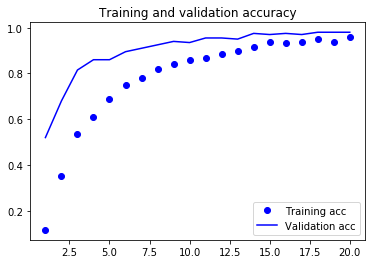

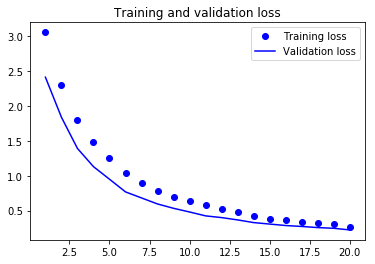

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
validation_labels.shape
train_labels.shape

(1664, 23)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8388864   
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 23)                5911      
Total params: 8,394,775
Trainable params: 8,394,775
Non-trainable params: 0
_________________________________________________________________


##  Model Implemented on Testing Set 

In [20]:
import cv2
#fit on testing data
model=model1(train_features.shape[1:],len(labels))
model.compile(optimizer=optimizers.adam(lr=2e-5),loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=20,batch_size=64,validation_data=(test_features, test_labels))

Train on 1664 samples, validate on 200 samples
Epoch 1/20
1664/1664 [==============================] - 3s 2ms/step - loss: 3.0505 - acc: 0.1280 - val_loss: 2.4029 - val_acc: 0.4950
Epoch 2/20
1664/1664 [==============================] - 3s 2ms/step - loss: 2.2465 - acc: 0.3786 - val_loss: 1.8258 - val_acc: 0.6450
Epoch 3/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.7776 - acc: 0.5403 - val_loss: 1.3794 - val_acc: 0.7750
Epoch 4/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.4339 - acc: 0.6322 - val_loss: 1.1017 - val_acc: 0.8450
Epoch 5/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.1833 - acc: 0.7043 - val_loss: 0.9104 - val_acc: 0.8500
Epoch 6/20
1664/1664 [==============================] - 3s 2ms/step - loss: 1.0268 - acc: 0.7428 - val_loss: 0.7839 - val_acc: 0.9050
Epoch 7/20
1664/1664 [==============================] - 3s 2ms/step - loss: 0.8586 - acc: 0.7933 - val_loss: 0.6619 - val_acc: 0.8950
Epoch 8/20
1664

## Testing on random Images from google

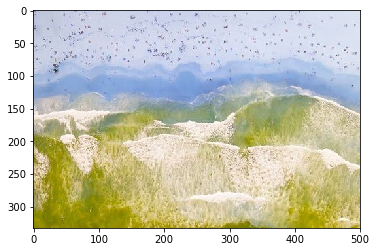

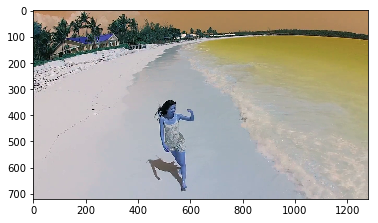

In [21]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('dataset//test2//beach1.PNG')
cv2.imshow('image',img)
plt.imshow(img)
plt.show()

img2 = cv2.imread('dataset//test2//beach2.PNG')
cv2.imshow('image',img2)
plt.imshow(img2)
plt.show()


In [22]:
#f1=extract_features(validation_dir, 1,1)

In [23]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('VGG16_model.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('dataset//test2//beach1.PNG')
img = cv2.resize(img,(256,256))
img = np.reshape(img,[1,256,256,3])
xinput=conv_base.predict(img)
cc=model.predict_classes(xinput)
print(cc,"1****")


img2 = cv2.imread('dataset//test2//beach1.PNG')
img2 = cv2.resize(img2,(256,256))
img2 = np.reshape(img2,[1,256,256,3])
xinput2=conv_base.predict(img2)
cc2=model.predict_classes(xinput2)
print(cc2,"****2")



[20] 1****
[20] ****2


In [24]:
class_names1

{'.ipynb_checkpoints': 0,
 'Flow': 1,
 'agricultural': 2,
 'airplane': 3,
 'baseballdiamond': 4,
 'beach': 5,
 'buildings': 6,
 'chaparral': 7,
 'denseresidential': 8,
 'forest': 9,
 'freeway': 10,
 'golfcourse': 11,
 'harbor': 12,
 'intersection': 13,
 'mediumresidential': 14,
 'mobilehomepark': 15,
 'overpass': 16,
 'parkinglot': 17,
 'river': 18,
 'runway': 19,
 'sparseresidential': 20,
 'storagetanks': 21,
 'tenniscourt': 22}